<a href="https://colab.research.google.com/github/ruinoah5/AI6102-ML-Metho/blob/main/manual_labelling_noppu_rq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os # Import os module to use os.listdir

path = '/content/drive'
drive.mount(path) # Mount the drive first
print(os.listdir(path)) # Then list its contents

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']


In [2]:
import os
#video_folder = path + '/MyDrive/ColabNotebooks/mixed_group_21'
video_folder = path + '/MyDrive/AI6102 Machine Learning: Methodologies & Applications/mixed_group_21'
videos = [f for f in os.listdir(video_folder) if f.endswith('.mp4')]
videos.sort()

print('Total videos found: ', len(videos))

Total videos found:  100


In [3]:
import base64
from IPython.display import display, HTML

def display_video_autoplay(path, width=500, height=405, loop=True, controls=True):
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")

    display(HTML(f"""
    <video width="{width}" height="{height}"
           {"controls" if controls else ""} autoplay muted playsinline {"loop" if loop else ""}
           style="display:block; max-width:100%; border:1px solid #ddd;">
      <source src="data:video/mp4;base64,{b64}" type="video/mp4">
    </video>
    """))


In [4]:

semantic_questions_str = '''
1. Is any vehicle missing, duplicated, or clearly misrepresented?
2. Is any pedestrian missing, duplicated, or incorrectly placed?
3. Are traffic light states incorrect or inconsistent with the scene?
4. Are lane markings missing, distorted, or suddenly changed?
5. Are road signs incorrect, missing, or inconsistent with context?
'''
semantic_questions = [x for x in semantic_questions_str.split('\n') if x != '']
semantic_questions


physical_questions_str = '''
1. Does any object violate physical consistency (e.g., teleport, overlap unnaturally, geometry is off, wheels floating)?
2. Is there any temporal inconsistency across consecutive frames (The individual frames might look physically correct — but the transition between frames is impossible)?
3. -
4. -
5. -
'''
physical_questions = [x for x in physical_questions_str.split('\n') if x != '']
physical_questions

decision_questions_str = '''
1. Does the vehicle fail to stop at a red light/ go at a green light?\n
2. Does the vehicle fail to yield to pedestrians or other vehicles?\n
3. Is obstacle avoidance handled improperly or too late?\n
4. Does the vehicle perform a dangerous or unreasonable maneuver?\n\n
5. -
'''
decision_questions = [x for x in decision_questions_str.split('\n') if x != '']
decision_questions

['1. Does the vehicle fail to stop at a red light/ go at a green light?',
 '2. Does the vehicle fail to yield to pedestrians or other vehicles?',
 '3. Is obstacle avoidance handled improperly or too late?',
 '4. Does the vehicle perform a dangerous or unreasonable maneuver?',
 '5. -']

In [31]:
import os, time, random
from IPython.display import clear_output, display as ipy_display

def ask_questions_one_by_one(video_name, video_path, section_name, questions):

    n = len(questions)
    answers_list = answers_list[:]*n
    reasons_str = "" # Initialize reasons_str here to ensure it's always defined

    scaleFactor = 1
    display_video_autoplay(video_path, width=scaleFactor*2688, height=scaleFactor*748, loop=True)
    print(f'Consider [{section_name}] of [{video_name}]\n')
    print('Questions for this section:\n')
    for i, q in enumerate(questions):
        print(f'{q}')
    time.sleep(0.2)

    while True:
        # Prompt user to input violated question numbers
        user_input = input(f"\nKey in ONLY the question numbers that the generated video has violated (e.g., '1, 3')\n")

        if user_input.strip() == '0':
            print(str(answers_list))
            break

        # Mark the violated questions in the answers_list
        violated_nums_str = [x.strip() for x in user_input.split(',')]
        violated_nums = []
        for s in violated_nums_str:
            num = int(s)
            if not (1 <= num <= n):
                raise ValueError(f"Question number '{num}' is out of range (1-{n}).")
            if num in violated_nums: # Check for duplicates
                raise ValueError(f"Question number '{num}' entered multiple times.")
            violated_nums.append(num)

        for q_num in violated_nums:
            answers_list[q_num - 1] = 1 # Set to 1 for violated (using 0-based indexing)
        print('Violations:', str(answers_list), '\n')

        # Parse the input string into a list of integers
        reasons_str = input(f"\nKey in the reasons why they are being violated?\n") # This local variable will be returned
        input('\nReview, then press Enter to continue: \n')
        break

    clear_output(wait=True) # Clear output for the next section
    return answers_list, reasons_str # Return both the updated answers_list and reasons_str


In [27]:
ground_truth = {
    "Questions": {
        "semantic_correctness": semantic_questions,
        "physical_consistency": physical_questions,
        "decision_rationality": decision_questions
    },
    "AnswersReasons": {},
}

for video in videos[33:65]: # Iterate over only the first video
    video_path = os.path.join(video_folder, video)

    ground_truth["AnswersReasons"][video] = {
        "semantic_correctness": [0, 0, 0, 0, 0],
        "reasoning_semantic"  : "NA",
        "physical_consistency": [0, 0, 0, 0, 0],
        "reasoning_physical"  : "NA",
        "decision_rationality": [0, 0, 0, 0, 0],
        "reasoning_decision"  : "NA",
    }

    ground_truth["AnswersReasons"][video]["semantic_correctness"], ground_truth["AnswersReasons"][video]["reasoning_semantic"] = ask_questions_one_by_one(
        video, video_path,
        "Semantic Correctness",
        semantic_questions
    )

    ground_truth["AnswersReasons"][video]["physical_consistency"], ground_truth["AnswersReasons"][video]["reasoning_physical"] = ask_questions_one_by_one(
        video, video_path,
        "Physical Consistency",
        physical_questions
    )

    ground_truth["AnswersReasons"][video]["decision_rationality"], ground_truth["AnswersReasons"][video]["reasoning_decision"] = ask_questions_one_by_one(
        video, video_path,
        "Decision Rationality",
        decision_questions
    )

clear_output(wait=True)
print("✅ Done! ground_truth is ready.")

ground_truth

Consider [Decision Rationality] of [33.mp4]

Questions for this section:

1. Does the vehicle fail to stop at a red light/ go at a green light?
2. Does the vehicle fail to yield to pedestrians or other vehicles?
3. Is obstacle avoidance handled improperly or too late?
4. Does the vehicle perform a dangerous or unreasonable maneuver?
5. -

Key in ONLY the question numbers that the generated video has violated (e.g., '1, 3')
3
Violations: [0, 0, 1, 0, 0] 


Key in the reasons why they are being violated?
HI


KeyboardInterrupt: Interrupted by user

In [ ]:
# import json
# labeler = 'ruiqi_test'

# folder_path = '/content/drive/MyDrive/AI6102 Machine Learning: Methodologies & Applications/RuiQi/ColabNotebooks/'
# with open(f"{folder_path}ground_truth_{labeler}.json", "w") as f:
#     json.dump(ground_truth, f, indent=4)

# with open(f"{folder_path}ground_truth_{labeler}.json", "r") as f:
#     temp = json.load(f)

# temp

Submission format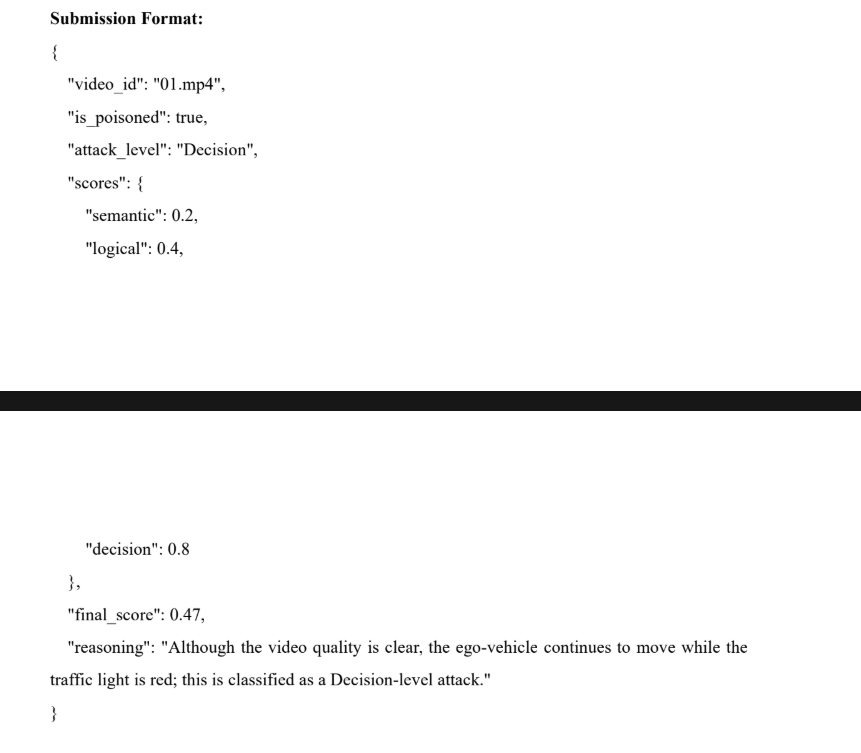

In [28]:
# submission format
import json

n_sem = len(semantic_questions)
n_phys = len(physical_questions)
n_dec = len(decision_questions)

# This list will hold the submission entries for each video
videos_submission_list = []

# Iterate through the videos in the ground_truth dictionary
for video_id_key, video_data in ground_truth["AnswersReasons"].items():
    # Extract answers lists and reasoning strings for each category
    sem_answers = video_data.get("semantic_correctness")
    sem_reasoning = video_data.get("reasoning_semantic")
    phys_answers = video_data.get("physical_consistency", [])
    phys_reasoning = video_data.get("reasoning_physical")
    dec_answers = video_data.get("decision_rationality", [])
    dec_reasoning = video_data.get("reasoning_decision")

    # Determine if the video is poisoned
    is_poisoned = bool(1 in sem_answers or 1 in phys_answers or 1 in dec_answers)

    # Calculate scores for each category (rounded to 2 decimal places)
    semantic_score = sum(sem_answers) / n_sem if n_sem > 0 and sem_answers else 0.0
    logical_score = sum(phys_answers) / n_phys if n_phys > 0 and phys_answers else 0.0 # 'logical' in output format refers to 'physical'
    decision_score = sum(dec_answers) / n_dec if n_dec > 0 and dec_answers else 0.0

    scores = {
        "semantic": round(semantic_score, 2),
        "logical": round(logical_score, 2),
        "decision": round(decision_score, 2)
    }

    # Determine attack_level based on the presence of violations, prioritizing Decision > Physical > Semantic
    attack_level = "None"
    if is_poisoned:
        if decision_score > 0:
            attack_level = "Decision"
        elif logical_score > 0:
            attack_level = "Physical"
        elif semantic_score > 0:
            attack_level = "Semantic"

    # Calculate final_score
    final_score = 0.0
    if is_poisoned:
        # For simplicity, taking the maximum of the individual scores if poisoned
        # as the example's final_score might use a more complex formula not explicitly defined
        final_score = max(scores.values())
    final_score = round(final_score, 2)

    # Construct a comprehensive reasoning string
    all_reasons = []


    reasoning_text = {
        "Primary violation" : "",
        "Semantic violation": str(sem_answers),
        "Semantic Reasoning": sem_reasoning,
        "Physical violation": str(phys_answers),
        "Physical Reasoning": phys_reasoning,
        "Decision violation": str(dec_answers),
        "Decision Reasoning": dec_reasoning
    }

    if all_reasons:
        # Prioritize the reasoning of the determined attack_level if available, then combine others
        primary_reason = ""
        if attack_level == "Decision" and dec_reasoning:
            primary_reason = dec_reasoning
        elif attack_level == "Physical" and phys_reasoning:
            primary_reason = phys_reasoning
        elif attack_level == "Semantic" and sem_reasoning:
            primary_reason = sem_reasoning

        if primary_reason:
            reasoning_text["Primary violation"]= f"Classified as a {attack_level}-level attack. See explanation below"

            # Add other reasons if they exist and are not already covered
            # other_reasons = [r for r in all_reasons]
            # if other_reasons:
            #     reasoning_text += " Other issues: " + "; \n".join(other_reasons) + "." # Use \n for explicit newlines in joined string
        else: # Fallback if primary attack level has no specific reasoning, or if all are equally relevant
            reasoning_text["Primary violation"] = "Multiple issues with the same score. See explanation below"

    # Create the submission entry dictionary
    submission_entry = {
        "video_id": video_id_key,
        "is_poisoned": is_poisoned,
        "attack_level": attack_level,
        "scores": scores,
        "final_score": final_score,
        "reasoning": reasoning_text
    }
    videos_submission_list.append(submission_entry)

# Create the final submission format dictionary
arr_submission_format = {
    "Questions": {
        "semantic": semantic_questions,
        "physical": physical_questions,
        "decision": decision_questions
    },
    "VideosData": videos_submission_list
}




In [29]:
# Display the final arr_submission_format in JSON format using print() for better newline rendering
print(json.dumps(arr_submission_format, indent=1))

# Save to file
labeler = 'ruiqi_test'

folder_path = '/content/drive/MyDrive/AI6102 Machine Learning: Methodologies & Applications/RuiQi/ColabNotebooks/'
with open(f"{folder_path}ground_truth_{labeler}.json", "w") as f:
    json.dump(arr_submission_format, f, indent=1)

with open(f"{folder_path}ground_truth_{labeler}.json", "r") as f:
    temp = json.load(f)

temp

{
 "Questions": {
  "semantic": [
   "1. Is any vehicle missing, duplicated, or clearly misrepresented?",
   "2. Is any pedestrian missing, duplicated, or incorrectly placed?",
   "3. Are traffic light states incorrect or inconsistent with the scene?",
   "4. Are lane markings missing, distorted, or suddenly changed?",
   "5. Are road signs incorrect, missing, or inconsistent with context?"
  ],
  "physical": [
   "1. Does any object violate physical consistency (e.g., teleport, overlap unnaturally, geometry is off, wheels floating)?",
   "2. Is there any temporal inconsistency across consecutive frames (The individual frames might look physically correct \u2014 but the transition between frames is impossible)?",
   "3. -",
   "4. -",
   "5. -"
  ],
  "decision": [
   "1. Does the vehicle fail to stop at a red light/ go at a green light?",
   "2. Does the vehicle fail to yield to pedestrians or other vehicles?",
   "3. Is obstacle avoidance handled improperly or too late?",
   "4. Does

{'Questions': {'semantic': ['1. Is any vehicle missing, duplicated, or clearly misrepresented?',
   '2. Is any pedestrian missing, duplicated, or incorrectly placed?',
   '3. Are traffic light states incorrect or inconsistent with the scene?',
   '4. Are lane markings missing, distorted, or suddenly changed?',
   '5. Are road signs incorrect, missing, or inconsistent with context?'],
  'physical': ['1. Does any object violate physical consistency (e.g., teleport, overlap unnaturally, geometry is off, wheels floating)?',
   '2. Is there any temporal inconsistency across consecutive frames (The individual frames might look physically correct — but the transition between frames is impossible)?',
   '3. -',
   '4. -',
   '5. -'],
  'decision': ['1. Does the vehicle fail to stop at a red light/ go at a green light?',
   '2. Does the vehicle fail to yield to pedestrians or other vehicles?',
   '3. Is obstacle avoidance handled improperly or too late?',
   '4. Does the vehicle perform a dange

In [ ]:

## Previous questions used
# semantic_questions_str = '''
# 1. Does any vehicle appear or disappear abruptly without occlusion?\n
# 2. Does any pedestrian appear or disappear abruptly without occlusion?\n
# 3. Is any traffic light state inconsistent across nearby frames?\n
# 4. Are lane markings inconsistent or suddenly changing shape/type?\n
# 5. Is any object clearly misclassified (e.g., pedestrian as vehicle)?\n
# 6. Do object counts change suddenly without scene justification?\n
# 7. Do road signs change identity between adjacent frames?\n
# 8. Are object positions inconsistent with camera motion?\n
# 9. Is any major road element missing when it should be visible?\n
# 10. Are object sizes clearly unrealistic relative to scene scale?\n
# '''


# physical_questions_str = '''
# 1. Does any object teleport between consecutive frames?\n
# 2. Does any object move with physically impossible speed?\n
# 3. Are trajectories discontinuous without collision/occlusion?\n
# 4. Do objects overlap in space unrealistically?\n
# 5. Does any collision occur without spatial contact?\n
# 6. Do objects pass through solid obstacles?\n
# 7. Are shadows/reflections inconsistent with object motion?\n
# 8. Does ego vehicle motion violate smooth acceleration patterns?\n
# 9. Are turns or rotations physically implausible?\n
# 10.Does depth ordering flip incorrectly between frames?\n
# '''


# decision_questions_str = '''
# 1.Did the ego vehicle run a red light?\n
# 2.Did the ego vehicle ignore a visible stop sign?\n
# 3.Did the ego vehicle fail to yield to pedestrians?\n
# 4.Did the ego vehicle fail to brake for a clear obstacle?\n
# 5.Did the ego vehicle make an unsafe lane change?\n
# 6.Did the ego vehicle follow too closely at speed?\n
# 7.Did the ego vehicle turn across oncoming traffic unsafely?\n
# 8.Did the ego vehicle accelerate toward a visible hazard?\n
# 9.Did the ego vehicle ignore right-of-way rules?\n
# 10. Did the ego vehicle create a near-collision risk by its action?\n
# '''
